In [1]:
library("tidyverse")
library("dplyr")
library("zoo")
library("pomp")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘pomp’


The following object is masked from ‘package:zoo’:

    time<-


The following object is masked from ‘package:purrr’:

    map




In [2]:
setwd("~/Desktop/School/research/pf_mobility")

In [103]:
source("scripts/read_data.R")
source("constants/file_loc.R")

source("functions/d_measure.R")
source("functions/r_process.R")
source("functions/disc_gamma.R")
source("functions/run_pfilter.R")
source("functions/simulate_data.R")
source("functions/get_renewal.R")
source("functions/get_true_rt.R")

In [120]:
covid <- read_data(file_loc = covid_file_loc, country_code = "NZ")

In [121]:
covid_nz <- covid[1:200,]
covid_nz$idx <- 1:nrow(covid_nz)

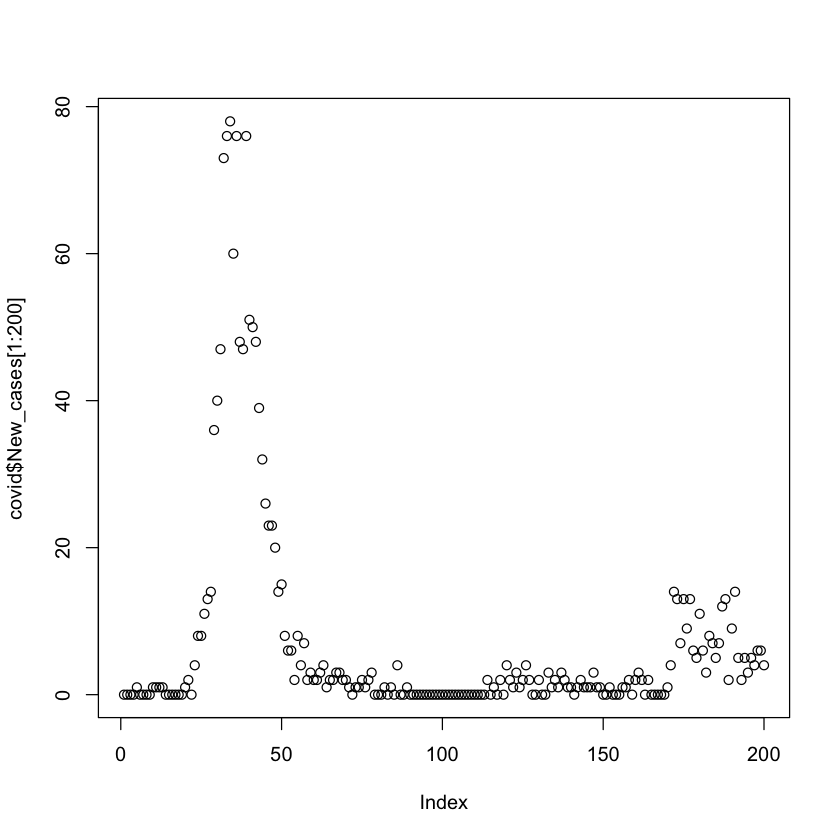

In [122]:
plot(covid$New_cases[1:200])

In [123]:
covid[1:50,]

,New_cases,y,idx
,<int>,<dbl>,<int>
53,0,0,1
54,0,0,2
55,0,0,3
56,0,0,4
57,1,0,5
58,0,0,6
59,0,0,7
60,0,0,8
61,0,0,9


In [106]:
nz_filter <- run_pfilter(rprocess_config = tran_normal_epifilter, dmeasure_config = meas_pois,
                        data = covid_nz, 
                         shape = 2.3669, scale = 2.7463,
                         Np=500, x_init = 1)

NOTE: The provided objects ‘T’,‘Y’ are available for use by POMP basic components.



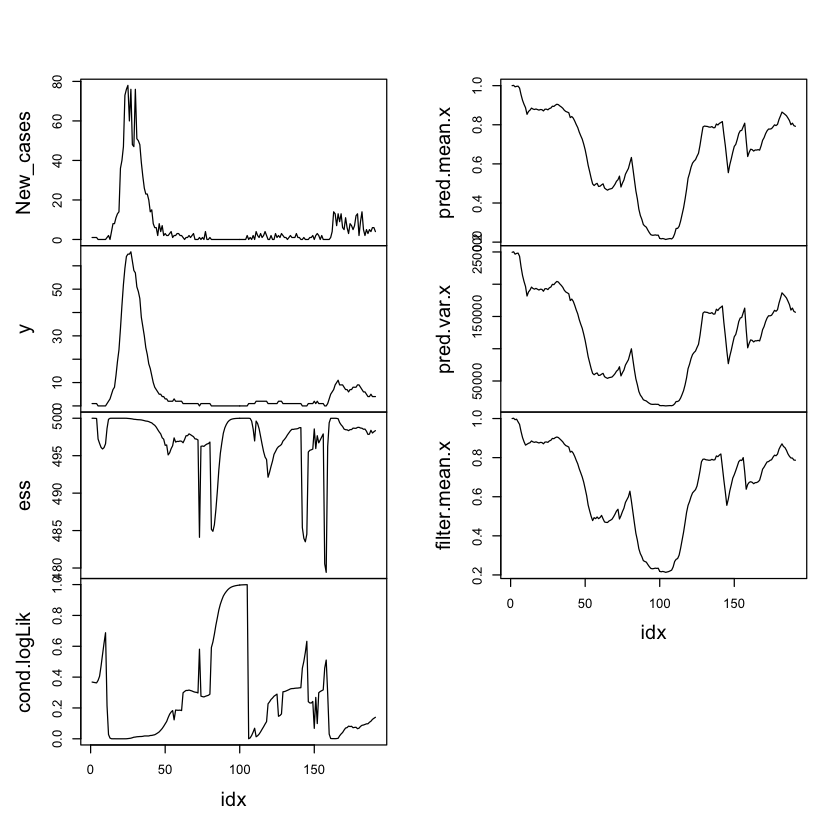

In [107]:
plot(nz_filter)

In [108]:
nz_true_rt <- get_true_rt(covid_nz$y, g_shape =2.3669, g_scale =  2.7463)

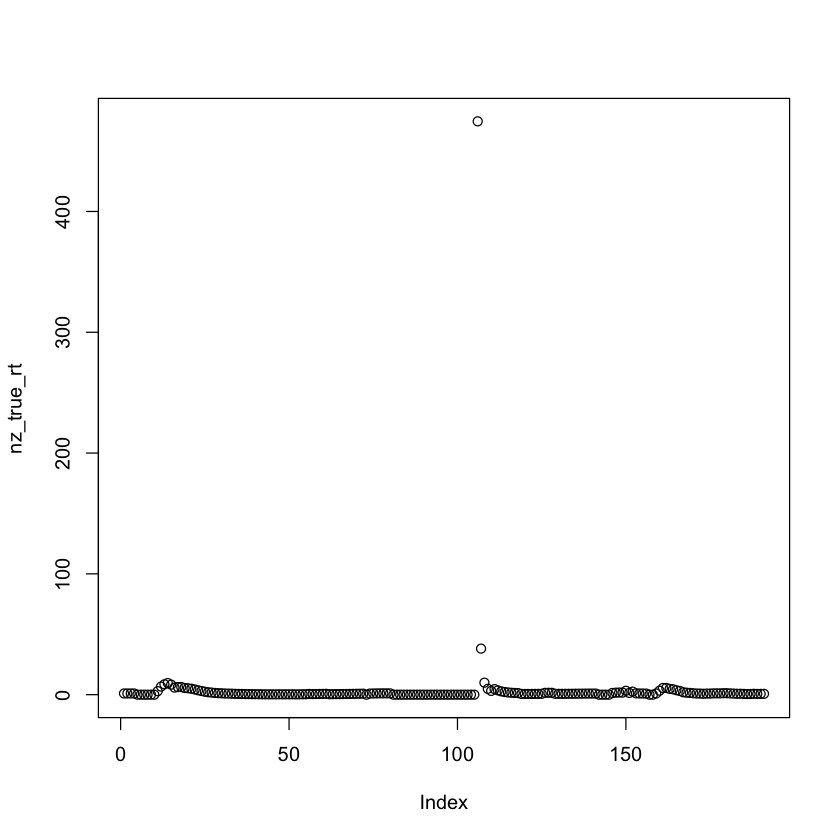

In [110]:
plot(nz_true_rt)

In [113]:
covid_nz$y


[1]  1  1  1  1  0  0  0  0  0  0  1  2  3  5  7  8 13 19 24 33 43 52 59 64 65
 [26] 65 66 62 58 57 51 49 46 38 34 30 25 22 18 16 13 10  8  7  6  5  5  4  4  3
 [51]  3  2  2  2  2  3  2  2  2  2  2  1  1  1  1  1  1  1  1  1  1  1  0  1  1
 [76]  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[101]  0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  2  2  2  1  1  1  1  1  1  1
[126]  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0  1  1  1  1  2
[151]  1  2  1  1  1  1  0  0  1  3  5  6  7  9 10 11  9  9  9  8  7  7  6  7  7
[176]  8  8  8  9  9  8  7  6  6  5  4  4  5  4  4  4